In [ ]:
import matplotlib as plt
import pandas as pd
import numpy as np
import seaborn as sb
from pathlib import Path
import matplotlib.pyplot as plot
from datetime import datetime

In [ ]:
DIR = r"C:\Temp\ML_Fruad_Files"
DIR_PROTOCOL = r"C:\Temp\ML_Fruad_Files\Protocol"
DIR_Neighborhood = r"C:\Temp\ML_Fruad_Files\Neighborhood_Clusters"

In [ ]:
# creating directory and folder
folder_path = Path(DIR_PROTOCOL)
folder_path.mkdir(parents=True, exist_ok=True)

In [ ]:
df=pd.read_pickle(f'{DIR}\df_after_stage5.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29210 entries, 0 to 29209
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   is_female                            29210 non-null  int64  
 1   lat                                  29210 non-null  float64
 2   long                                 29210 non-null  float64
 3   amt                                  29210 non-null  float64
 4   merch_lat                            29210 non-null  float64
 5   merch_long                           29210 non-null  float64
 6   num_neighborhoods                    29210 non-null  int64  
 7   distance_merch_cust                  29210 non-null  float64
 8   trans_hour                           29210 non-null  int64  
 9   num_transactions                     29210 non-null  int64  
 10  max_amount                           29210 non-null  float64
 11  min_amount                  

is_fraud
False    28986
True       224
Name: count, dtype: int64

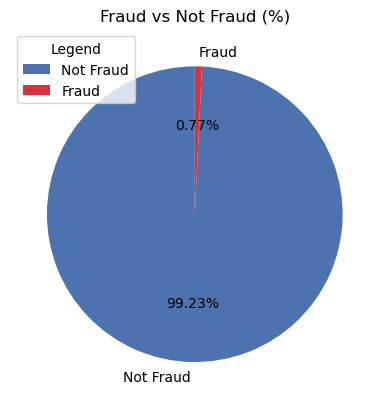

In [ ]:
# fraud rate is significantly lower than the rate of legitimate transactions
# the dataset need to balance because the data has
display(df['is_fraud'].value_counts())
labels = ['Not Fraud', 'Fraud']  # names
colors = ['#4C72B0', '#DB323A']  # colors

df['is_fraud'].value_counts(normalize=True).plot(
    kind='pie',
    autopct='%.2f%%',
    labels=labels,
    colors=colors,
    startangle=90
)

plot.ylabel("")
plot.title("Fraud vs Not Fraud (%)")
plot.legend(title="Legend", loc='best')
plot.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
#import pkg_resources

In [ ]:
# install xgboost-3.1.1
#pip install --upgrade xgboost

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    return {
        "Precision (Fraud)": precision_score(y_test, y_pred, zero_division=0),
        "Recall (Fraud)": recall_score(y_test, y_pred, zero_division=0),
        "F1 (Fraud)": f1_score(y_test, y_pred, zero_division=0),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }


In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

# List of balancing models for operation
balancing_methods = {
    "No Balance": None,
    "RandomOverSampler": RandomOverSampler(random_state=42),
    "RandomUnderSampler": RandomUnderSampler(random_state=42),
    "SMOTE": SMOTE(random_state=42),
    "SMOTE_Tomek": SMOTETomek(random_state=42)
}


In [ ]:
# Remark: 2 models i took it out from use.
#1. SVC model took long time - so i took it out from use.
#2. Logistic Regression - displayed an error message about being unable to complete the iterations -> "STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT"
# when i use pipeline - it doent help. when i raised the level of max_iter - it was very slow and still show the error message

#    "Logistic Regression": Pipeline([
#        ("scaler", StandardScaler()),
#        ("clf", LogisticRegression(
#            solver='saga',
#            max_iter=1000,
#            random_state=42
#        ))
#    ]),

#It is enough to examine one model to know whether the IMABALNCE method is necessary.
# i choose Xgboost
models = {
    #"DecisionTreeClassifier" : DecisionTreeClassifier(random_state=42),
    #"RandomForest": RandomForestClassifier(random_state=42),
    #"AdaBoost": AdaBoostClassifier(random_state=42),
    #"GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
    "Xgboost": xgb.XGBClassifier(random_state=42)
}

In [ ]:
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train = X_train.astype(float)
#X_test = X_test.astype(float)

In [ ]:

results = []

for model_name, model in models.items():
    for bal_name, balancer in balancing_methods.items():

        try:
            if balancer is None:
                X_train_bal, y_train_bal = X_train, y_train
            else:
                X_train_bal, y_train_bal = balancer.fit_resample(X_train, y_train)

            metrics = evaluate_model(model, X_train_bal, y_train_bal, X_test, y_test)

            results.append({
                "Model": model_name,
                "Balancing": bal_name,
                "Precision": metrics["Precision (Fraud)"],
                "Recall": metrics["Recall (Fraud)"],
                "F1 Score": metrics["F1 (Fraud)"],
                "Confusion Matrix": metrics["Confusion Matrix"]
            })
            print(f" {datetime.now().strftime('%d/%m/%y %H:%M')} -> {model_name} model {bal_name} " )

        except Exception as e:
            print(f"❌ Error in {model_name} with {bal_name}: {e}")
results_df = pd.DataFrame(results)
#results_df


 10/11/25 21:53 -> Xgboost model No Balance 
 10/11/25 21:53 -> Xgboost model RandomOverSampler 
 10/11/25 21:53 -> Xgboost model RandomUnderSampler 


C:\Users\rache\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\rache\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\rache\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\rache\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

 10/11/25 21:53 -> Xgboost model SMOTE 
 10/11/25 21:54 -> Xgboost model SMOTE_Tomek 


In [ ]:
results_df.sort_values(
    by=['F1 Score', 'Recall'],
    ascending=False
)

,Model,Balancing,Precision,Recall,F1 Score,Confusion Matrix
1,Xgboost,RandomOverSampler,0.630435,0.828571,0.716049,"[[5790, 17], [6, 29]]"
0,Xgboost,No Balance,0.718750,0.657143,0.686567,"[[5798, 9], [12, 23]]"
4,Xgboost,SMOTE_Tomek,0.549020,0.800000,0.651163,"[[5784, 23], [7, 28]]"
3,Xgboost,SMOTE,0.562500,0.771429,0.650602,"[[5786, 21], [8, 27]]"
2,Xgboost,RandomUnderSampler,0.084399,0.942857,0.154930,"[[5449, 358], [2, 33]]"


**conclusions:**

according the results
it seems that Xgboost RandomOverSampler model is the best model

Recall -> Identify fruad best from others -> 82% -> identify 29 frauds

precision -> Detected a fake fruad -> 17 transactions identified as fraudulent

In fraud detection performance metrics, **Recall is the most critical metric**, as it measures how many of the real frauds we were able to detect.
Precision is important, but to a lesser extent, because false positives can be handled by humans, while missing a fraud can cause financial damage.
F1-Score, which is a harmonic average of Recall and Precision, and provides a balanced measure that reflects the quality of the model when both are taken into account.


In [ ]:
model = xgb.XGBClassifier(random_state=42)
balancer = RandomOverSampler(random_state=42)
# divide data by SMOTETomek
X_bal, y_bal = balancer.fit_resample(X_train, y_train)
# running the model
model.fit(X_bal,y_bal)
#confusion_matrix(y_test,y_pred)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
#importances = model.feature_importances_
#features = X.columns

In [ ]:
print("Before ROS y_train:", y_train.shape)
print("After ROS y_bal:", y_bal.shape)

Before ROS y_train: (23368,)
After ROS y_bal: (46358,)


In [ ]:
df_cm = pd.DataFrame(cm,
                     index=['Actual: Not Fraud', 'Actual: Fraud'],
                     columns=['Predicted: Not Fraud', 'Predicted: Fraud'])

print(df_cm)

                   Predicted: Not Fraud  Predicted: Fraud
Actual: Not Fraud                  5790                17
Actual: Fraud                         6                29


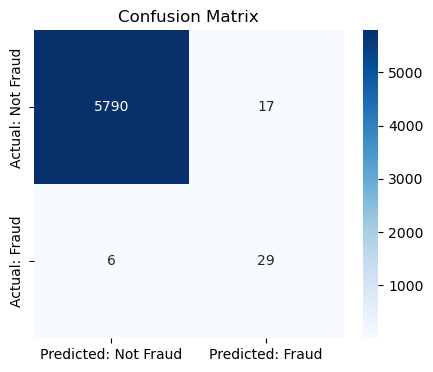

In [ ]:
plot.figure(figsize=(5,4))
sb.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plot.title("Confusion Matrix")
plot.show()

In [ ]:
def show_Confusion_matrix_in_precentage(cm, model_name):

    # sum all
    #cm_sum = np.sum(cm)
    #cm_percent = cm / cm_sum * 100
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    plot.figure(figsize=(5,4))
    sb.heatmap(cm_percent, annot=True, fmt=".2f", cmap='Blues')  # fmt=".2f" כדי להראות אחוזים עם שתי ספרות אחרי הנקודה
    plot.title(f"Confusion Matrix (%) - {model_name}")
    plot.xlabel("Predicted")
    plot.ylabel("Actual")
    plot.show()

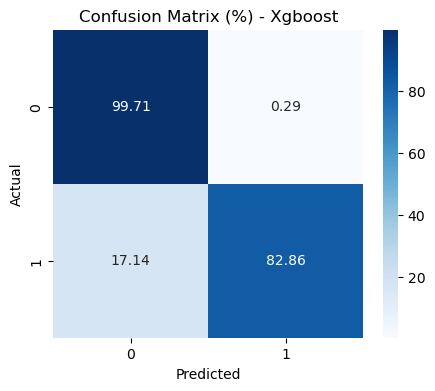

In [ ]:
 show_Confusion_matrix_in_precentage(np.array(cm), 'Xgboost')

**conclusions:**

5790 -> real transction - correctly identified -> 99.71%

17 -> real transction - identified as fraud (error) -> 0.29%

6 -> fraud transaction - identified as real (error) -> 17.14%

29 -> fraud transaction -> correctly identified -> 82.86%